可以在[Bookshop.org](https://bookshop.org/a/98697/9781098155438) 和
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325)获取纸制版和电子版的*Think Python 3e*.

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://gitee.com/regentsai/Think_Python_3e_CN/blob/master/thinkpython.py');
download('https://gitee.com/regentsai/Think_Python_3e_CN/blob/master/diagram.py');
download('https://gitee.com/regentsai/Think_Python_3e_CN/blob/master/jupyturtle.py');

In [2]:
import thinkpython

%load_ext autoreload
%autoreload 2

# 第4章：函数和接口

本章介绍名为`jupyturtle`的模块，这个模块允许你指挥一只想象中的海龟，创建简单的绘画。我们会使用这个模块绘制方块，多边形和圆，并展示**界面设计interface design**。界面设计是设计一起协作的函数的一种方式。

##  jupyturtle模块

要使用`jupyturtle`模块，我们可以像这样进行导入：

In [3]:
import jupyturtle

现在我们可以使用模块中定义的函数，例如`make_turtle`和`forward`。

In [4]:
jupyturtle.make_turtle()
jupyturtle.forward(100)

`make_turtle`创建一个**画布canvas**，在画布的空间内我们可以绘画；`make_turtle`还会创建一只海龟，由圆形的壳和三角形的头表示。圆圈显示了海龟的位置，而三角形表示了海龟的面向方向。

我们将多次使用`jupyturtle`中定义的函数，因此不每次带上模块的名字会比较方便。如果我们像这样导入模块，就能做到：

In [5]:
from jupyturtle import make_turtle, forward

这种导入语句从`jupyturtle`模块导入`make_turtle`和`forward`函数，我们可以直接调用他们：

In [6]:
make_turtle()
forward(100)

`jupyturtle`还提供了两个函数，`left`与`right`。我们将像这样进行导入：

In [7]:
from jupyturtle import left, right

`left`函数将让海龟向左转，它接受一个参数，即向左转的度数。例如，我们可以让海龟向左转90度。

In [8]:
make_turtle()
forward(50)
left(90)
forward(50)

这段程序让海龟向东移动，然后向北移动，在海龟的身后留下两个线段。在你继续学习之前，看看你能否调整这段程序，绘制一个方块。

## 绘制一个方块

以下是绘制方块的一种方法：

In [9]:
make_turtle()

forward(50)
left(90)

forward(50)
left(90)

forward(50)
left(90)

forward(50)
left(90)

由于相同的代码片段重复了4次，我们可以用`for`循环写地更简洁：

In [10]:
make_turtle()
for i in range(4):
    forward(50)
    left(90)

## 封装和泛化

现在让我们将绘制方块的代码放到名为`square`的函数中。

In [11]:
def square():
    for i in range(4):
        forward(50)
        left(90)

然后我们可以像这样调用函数：

In [12]:
make_turtle()
square()

将一段代码包围在函数中的动作称作**封装encapsulation**。封装的好处之一是它将这段代码与一个名字联系在一起，成为某种意义上的文档；另一个好处在于，如果你重新使用这段代码，调用两次函数要比复制粘贴函数体更简洁！

在目前的版本中，方块的大小始终为`50`。如果我们想要绘制不同大小的方块，我们可以将边长`length`作为参数：

In [13]:
def square(length):
    for i in range(4):
        forward(length)
        left(90)

现在我们可以绘制不同大小的方块了：

In [14]:
make_turtle()
square(30)
square(60)

给一个函数添加参数称为**泛化generalization**，因为它让函数变得更加泛用：在之前的版本，方块的大小始终不变，而现在的版本方块大小可以进行修改。

如果我们添加额外的参数，我们可以让函数更加泛用。下面的函数绘制给定数量边数的正多边形：

In [15]:
def polygon(n, length):
    angle = 360 / n
    for i in range(n):
        forward(length)
        left(angle)

正`n`边形相邻边的夹角为`360 / n`度。

下面的例子绘制了一个边长为`30`的正七边形：

In [16]:
make_turtle()
polygon(7, 30)

当函数有许多实参时，很容易忘记它们是什么，或者它们的顺序是什么。在实参列表中包含形参的名字是个好主意。

In [17]:
make_turtle()
polygon(n=7, length=30)

这些实参有时称作“具名实参”(named arguments)，因为它们包含形参名。但在Python中它们更常被称作**关键字参数keyword arguments**（不要与Python的关键字相混淆，如`for`和`def`）。

这里使用了赋值运算符`=`，提醒我们实参和形参是如何工作的：当你调用函数，实参被赋值给形参。

## 近似圆

现在假设我们要画一个圆。我们可以画一个有很多边的多边形，从而让每条边足够小，难以看到。下面是使用`polygon`绘制正30边形的近似圆。

In [18]:
import math

def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)

`circle`函数接受参数`radius`，作为圆的半径。它会计算`circumference`，即给定半径的圆的周长，`n`是边的数量，所以`circumference / n`是每条边的边长。

这个函数可能需要跑一段时间。我们可以在调用`make_turtle`时使用关键字参数`delay`设置每次行动之间海龟的延迟时间，单位为秒。默认值为`0.2`秒，将其设置为`0.02`可以以10倍速绘制。

In [19]:
make_turtle(delay=0.02)
circle(30)

这种方案的限制是`n`是常数，对于很大的圆，边长可能太长，对于很小的圆，绘制30条很短的边很浪费时间。一个方案是将`n`作为参数泛化函数，但让我们先保持简单吧。

## 重构

现在让我们编写比`circle`更泛用的版本，名为`arc`函数，接受第2个参数`angle`，绘制给定角度的圆弧。例如，如果`angle`是360度，`arc`将绘制完整的圆，如果`angle`是180度，`arc`将绘制半圆。

要编写`circle`函数，我们可以重用`polygon`，因为正多边形是圆的良好近似。但我们不能用`polygon`来编写`arc`。

相反，我们将创建`polygon`更泛用的版本，名为`polyline`。

In [20]:
def polyline(n, length, angle):
    for i in range(n):
        forward(length)
        left(angle)

`polyline`接受的参数为要绘制的线段数量`n`，线段的长度`length`以及相邻线段之间的夹角`angle`。

现在我们可以使用`polyline`重新编写`polygon`。

In [21]:
def polygon(n, length):
    angle = 360.0 / n
    polyline(n, length, angle)

我们也可以使用`polyline`来编写`arc`。

In [22]:
def arc(radius, angle):
    arc_length = 2 * math.pi * radius * angle / 360
    n = 30
    length = arc_length / n
    step_angle = angle / n
    polyline(n, length, step_angle)

`arc`与`circle`相似，除了它会计算`arc_length`，圆弧长度与圆周长的比和它们的角度之比相同。

最后，我们可以用`arc`重写`circle`函数。

In [23]:
def circle(radius):
    arc(radius,  360)

要检查这些函数是否符合预期，我们将使用它们画一只蜗牛。设置`delay=0`将让海龟跑得尽可能快。

In [25]:
make_turtle(delay=0)
polygon(n=20, length=9)
arc(radius=70, angle=70)
circle(radius=10)

在这个例子里面，我们从可以运行的代码开始，用不同的函数重新组织代码。像这样改善代码，但不改变代码的行为的过程称作**重构refactoring**。

如果我们先进行计划，我们也许可以直接先写`polyline`，避免重构，但是通常你在项目开始时不可能知道太多。当你开始编程，你对问题的理解会更加深入。有时重构标志着你学到了一些东西。

## 栈图

当调用`circle`时，将调用`arc`，而`arc`将调用`polyline`。我们可以用栈图显示函数调用的序列与每个函数的形参接收的值。

In [26]:
from diagram import make_binding, make_frame, Frame, Stack

frame1 = make_frame(dict(radius=30), name='circle', loc='left')

frame2 = make_frame(dict(radius=30, angle=360), name='arc', loc='left', dx=1.1)

frame3 = make_frame(dict(n=60, length=3.04, angle=5.8), 
                    name='polyline', loc='left', dx=1.1, offsetx=-0.27)

stack = Stack([frame1, frame2, frame3], dy=-0.4)

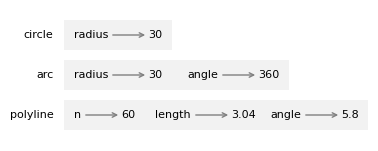

In [27]:
from diagram import diagram, adjust

width, height, x, y = [3.58, 1.31, 0.98, 1.06]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
#adjust(x, y, bbox)

注意`polyline`中的`angle`与`arc`中的`angle`值并不相同。形参是局部的，意味着你可以在不同的函数中使用相同的形参；它在每个函数里面是不同的变量，并且可以指向不同的值。

## 开发计划

**开发计划development plan**是编写程序的过程。本章使用的过程是“封装和泛化”。该过程如下：

1. 从没有函数定义的小程序开始编写；
2. 一旦该程序正确运行，确定一个连续的部分，将其封装到函数中并命名；
3. 添加合适的参数，让函数更加泛用；
4. 重复步骤1～3直到你获得了一组正确的函数；
5. 寻求机会，通过重构改善代码。例如，如果你在几个地方有类似的代码，考虑将其重构到合适的泛用函数中。

这个过程有一些缺陷，我们稍后会看到替代过程，但在你不知道如何将程序分解为函数时这个过程很有用。

函数的设计分为两部分：

- **界面interface**规定了函数如何使用，包括函数名，接受的参数和函数的用途；
- **实现implementation**是函数具体完成工作的方式。

例如，下面第1个版本的`circle`函数使用了`polygon`：

In [28]:
def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)

而使用`arc`的重构版本如下：

In [29]:
def circle(radius):
    arc(radius,  360)

这两个函数的界面相同：接受相同的参数，完成相同的功能，但它们的实现是不同的。

## 文档字符串

**文档字符串docstring**是在函数体第一行的字符串，解释了函数的界面。“doc”是文档“documentation”的缩写。

下面是一个例子：

In [30]:
def polyline(n, length, angle):
    """绘制一条折线，规定了线段的数量，长度和相邻线段之间的夹角。
    
    n: 整数，线段的数量
    length: 线段长度
    angle: 相邻线段之间的夹角，单位为角度
    """    
    for i in range(n):
        forward(length)
        left(angle)

习惯上，文档字符串是三引号字符串(triple-quoted strings)，也被称为**多行字符串multiline strings**，因为三引号字符串允许字符串跨越多行。

译注：三引号可以用成对的3个连续单引号包围，也可以用成对的3个连续双引号包围，但是不能混用。

文档字符串应该：

- 简洁解释函数的作用，不详细解释它是如何实现的；
- 如果有的参数的类型不明确，标明参数的类型

编写这种文档是接口设计的重要部分。良好定义的接口应该易于解释；如果你难以解释某个函数，这个函数的接口可能有待改善。

## 调试

接口像是一份函数与调用者之间的合同。调用者同意提供特定的参数，函数同意完成特定的工作。

例如，`polyline`要求3个参数：`n`必须是整数，`length`应该是正数，`angle`应该是代表角度的实数。

这些要求称作**前置条件preconditions**，因为它们应该在函数执行之前成立。相反，函数结束时的条件是**后置条件postconditions**。后置条件包括函数预期的作用（如绘制线段）以及副作用（如移动海龟，或者做了其他改变）。

满足前置条件是调用者的责任。如果调用者违反前置条件，函数没有正确工作，那么问题在于调用者，而不在函数中。

如果满足了前置条件，而后置条件没有满足，则问题在函数中。如果你的前置条件和后置条件清晰，则可以帮助你进行调试。

## 术语表

- **界面设计interface design**：设计函数界面的过程，包括函数应该接受的参数；
- **画布canvas**：一个窗口，展示线段，圆，矩形和其他形状组成的图形元素；
- **封装encapsulation**：将语句序列转移到函数定义中的过程；
- **泛化generalization**：将一些不必要的指定值（如数字）替换为合适的泛用对象（如变量和形参）的过程；
- **关键字参数keyword argument**：指名形参名的实参
- **重构refactoring**：调整能够运行的程序，改善函数的接口和其他质量；
- **开发计划development plan**：编写代码的过程；
- **文本字符串docstring**：出现在函数体开头的字符串，对函数的接口进行描述；
- **多行字符串multiline string**：用成对的3个连续引号包围的字符串，可以跨越程序的多行；
- **前置条件precondition**：调用者在函数运行之前应该满足的条件；
- **后置条件postcondition**：在函数结束之前应该满足的条件。

## 练习

In [31]:
# 这个单元格让Jupyter在出现运行时故障时提供更多调试信息。
# 在进行练习前先运行本单元格。

%xmode Verbose

Exception reporting mode: Verbose


对于以下的练习，你可能会用到几个函数：

- `penup`抬起海龟想象中的笔，从而不在纸上留下踪迹；
- `pendown`将笔落下，留下行动的踪迹。

下面的函数使用`penup`和`pendown`，移动海龟但不留下踪迹：

In [32]:
from jupyturtle import penup, pendown

def jump(length):
    """向前移动`length`的距离，不留下踪迹。
    
    后置条件：将笔落下。
    """
    penup()
    forward(length)
    pendown()

### 练习

编写程序`rectangle`，绘制给定宽度width和高度height的矩形。例如绘制一个宽度80,高度40的矩形。

你可以使用以下代码测试函数。

In [34]:
make_turtle()
rectangle(80, 40)

### 练习

编写`rhombus`，绘制菱形，接受参数为边长length和内角angle。例如绘制一个边长50,内角60度的菱形。

你可以使用以下代码测试函数：

In [36]:
make_turtle()
rhombus(50, 60)

### 练习

编写更泛用的函数`parallelogram`，绘制一个平行四边形。用`parallelogram`重写`rectangle`和`rhombus`。

你可以使用以下代码测试函数：

In [40]:
make_turtle(width=400)
jump(-120)

rectangle(80, 40)
jump(100)
rhombus(50, 60)
jump(80)
parallelogram(80, 50, 60)

### 练习

编写一些合适的泛用函数，绘制像这样的形状：

![](jupyturtle_pie.png)

提示：编写函数`triangle`绘制单个三角区域，然后编写函数`draw_pie`，使用`triangle`。

你可以使用以下代码测试函数：

In [ ]:
turtle = make_turtle(delay=0)
jump(-80)

size = 40
draw_pie(5, size)
jump(2*size)
draw_pie(6, size)
jump(2*size)
draw_pie(7, size)

### 练习

编写一些合适的泛用函数，绘制像这样的形状：

![](jupyturtle_flower.png)

提示：使用`arc`编写函数`petal`，绘制一个花瓣。

你可以使用以下代码测试函数。

由于需要绘制许多短线段，绘制速度可能很慢。在`make_turtle`中使用`auto_render=False`关键字参数以禁用自动渲染，在最后调用`render`函数以显示绘制结果。

当你调试时，你可能想要去除`auto_render=False`参数。

In [ ]:
from jupyturtle import render

turtle = make_turtle(auto_render=False)

jump(-60)
n = 7
radius = 60
angle = 60
flower(n, radius, angle)

jump(120)
n = 9
radius = 40
angle = 85
flower(n, radius, angle)

render()

### 询问虚拟助手

在Python中有一些模块与`jupyturtle`类似，我们本章使用的模块是经过修改的适应本书的版本。

如果你询问虚拟助手，它可能不知道用哪个模块。但如果你提供一些示例，它可能会想明白。例如，尝试以下提示词，看看它能否提供绘制螺旋的函数：

```txt
以下程序使用一个海龟图形模块绘制圆：

from jupyturtle import make_turtle, forward, left
import math

def polygon(n, length):
    angle = 360 / n
    for i in range(n):
        forward(length)
        left(angle)
        
def circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    polygon(n, length)
    
make_turtle(delay=0)
circle(30)

编写一个能够绘制螺旋的函数。
```

注意结果中可能有我们还没学习过的功能，也可能包含错误。复制虚拟助手的代码，看看它能否正确工作。如果你没有得到想要的结果。尝试修改提示词。

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)